In [1]:
%autosave 0

Autosave disabled


In [44]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import acquire
from acquire import new_iris_data
import prepare
from prepare import prep_iris
from prepare import split_data
from env import get_connection
from pydataset import data
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import os

import numpy as np
import pandas as pd

from env import get_connection

def get_db_connection(database):
    return get_connection(database)

In [4]:
def new_iris_data():
    sql_query = ("SELECT species_id, species_name, sepal_length, sepal_width, petal_length, petal_width FROM measurements JOIN species USING(species_id)")
    # Read in datafr from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    return df


def get_iris_data():
    if os.path.isfile('iris_df.csv'):
        # If csv file exists read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
    else:   
        # Read fresh data from Codeup db into a dataframe
        df = new_iris_data() 
        # Cache data
        df.to_csv('iris_df.csv')
    return df

In [5]:
#call the iris table
iris_df = get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [6]:
iris_df.describe()

,species_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,6.400000,3.300000,5.100000,1.800000
max,3.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#drop the two column as instructed. dont run again
iris_df = iris_df.drop(columns = ['species_id'])


In [8]:
print(iris_df.head())

  species_name  sepal_length  sepal_width  petal_length  petal_width
0       setosa           5.1          3.5           1.4          0.2
1       setosa           4.9          3.0           1.4          0.2
2       setosa           4.7          3.2           1.3          0.2
3       setosa           4.6          3.1           1.5          0.2
4       setosa           5.0          3.6           1.4          0.2


In [9]:
#rename the species_name column to just species
iris_df = iris_df.rename(columns={'species_name': 'species'})
iris_df


,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


In [10]:
def prep_iris(iris_data):
    return iris_data

# Get the Iris dataset data
untransformed_iris_df = get_iris_data()

# Apply the prep_iris function to transform the data
transformed_iris_df = prep_iris(untransformed_iris_df)

# Display the transformed DataFrame
print(transformed_iris_df.head())

   species_id species_name  sepal_length  sepal_width  petal_length  \
0           1       setosa           5.1          3.5           1.4   
1           1       setosa           4.9          3.0           1.4   
2           1       setosa           4.7          3.2           1.3   
3           1       setosa           4.6          3.1           1.5   
4           1       setosa           5.0          3.6           1.4   

   petal_width  
0          0.2  
1          0.2  
2          0.2  
3          0.2  
4          0.2  


In [11]:
# Get titanic data from codeup db
def new_titanic_data():
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    # Read in dataframe from Codeup db
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    return df


def get_titanic_data():
    if os.path.isfile('titanic_df.csv'):
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('titanic_df.csv', index_col=0)  
    else:  
        # Read data from db into a dataframe
        df = new_titanic_data() 
        # Write dataframe to a csv file
        df.to_csv('titanic_df.csv')
    return df


In [12]:
titanic_df = get_titanic_data()
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [13]:
titanic_df.shape

(891, 13)

In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [15]:
titanic_df.dtypes == 'object'

passenger_id    False
survived        False
pclass          False
sex              True
age             False
sibsp           False
parch           False
fare            False
embarked         True
class            True
deck             True
embark_town      True
alone           False
dtype: bool

In [16]:
col_mask = titanic_df.dtypes == 'object'
titanic_df.columns[col_mask]

Index(['sex', 'embarked', 'class', 'deck', 'embark_town'], dtype='object')

In [17]:
for col in titanic_df.columns[col_mask]:
    print(titanic_df[col].value_counts())
    print()

male      577
female    314
Name: sex, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64



In [18]:
#since this data contains redundant information
num_mask = titanic_df.dtypes != 'object'

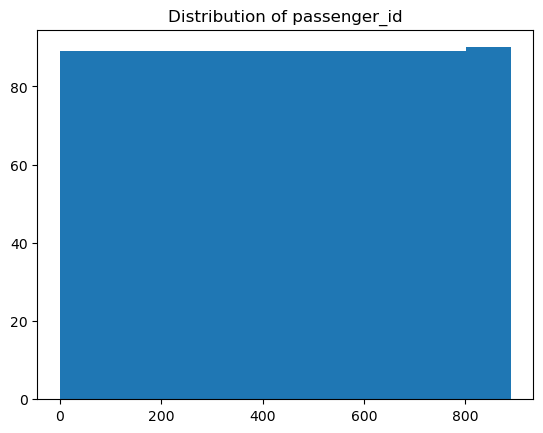

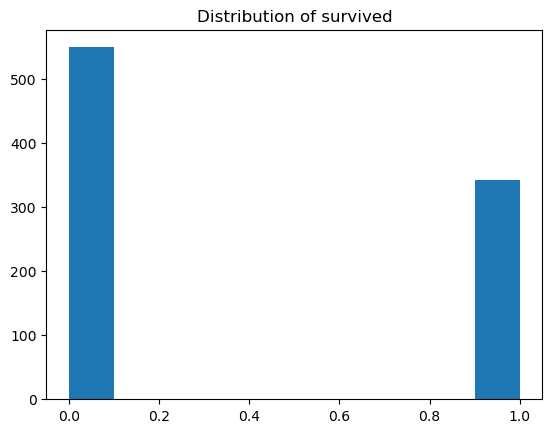

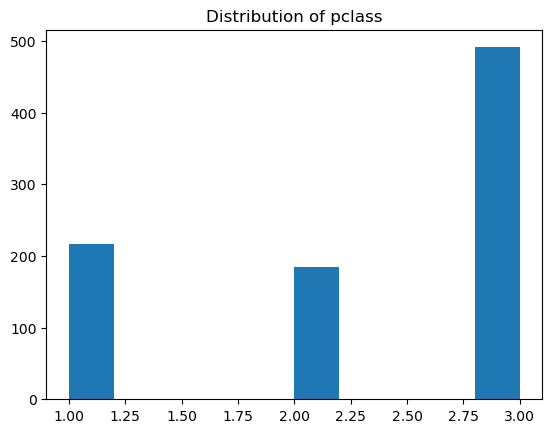

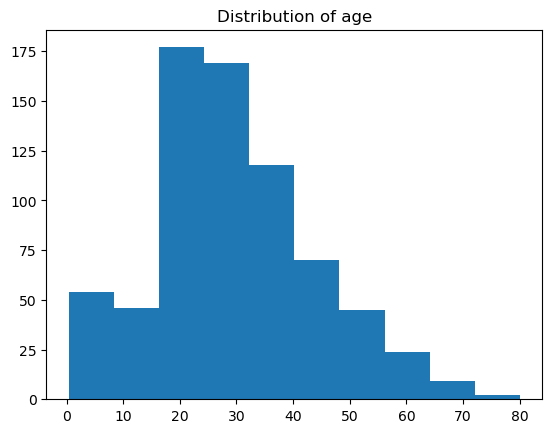

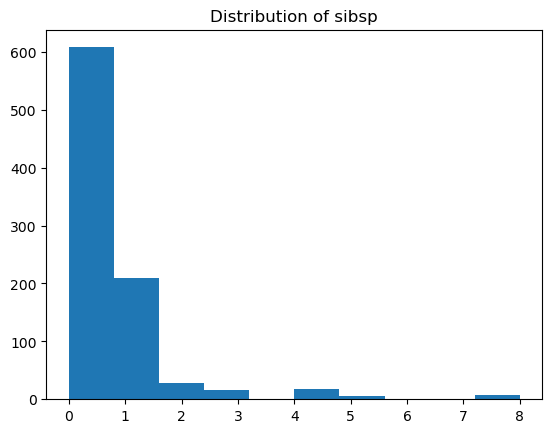

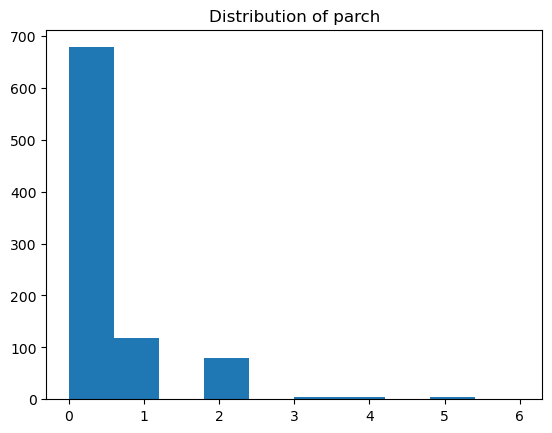

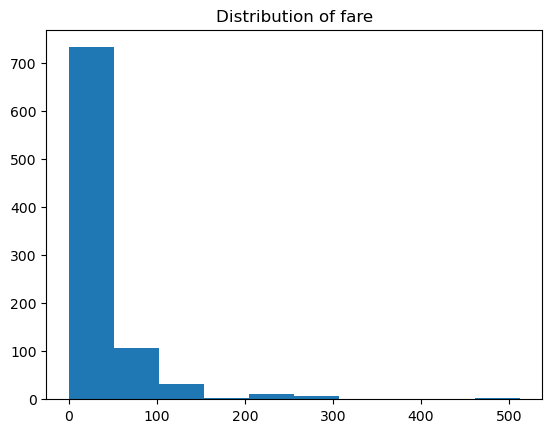

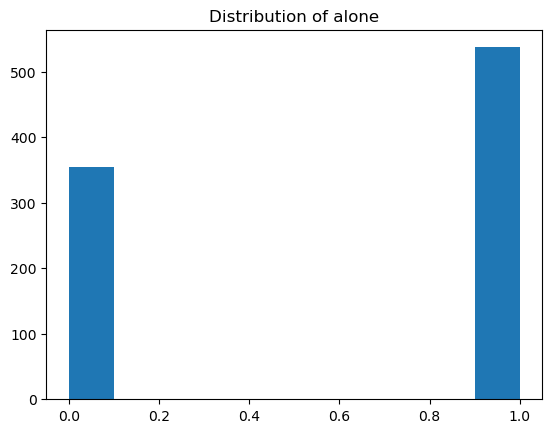

In [19]:
for col in titanic_df.columns[num_mask]:
    plt.figure()
    plt.hist(titanic_df[col])
    plt.title(f'Distribution of {col}')

In [20]:
#drop any unnecessary, unhelpful, or duplicated columns
#first we have to find redundant information and those that has no impact
titanic_df.drop(columns=['passenger_id', 'pclass', 'embarked'])
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [21]:
def prep_titanic(titanic_data):
    return titanic_data

# Get the Iris dataset data
untransformed_titanic_df = get_titanic_data()

# Apply the prep_iris function to transform the data
transformed_titanic_df = prep_iris(untransformed_titanic_df)

# Display the transformed DataFrame
print(transformed_titanic_df.head())

   passenger_id  survived  pclass     sex   age  sibsp  parch     fare  \
0             0         0       3    male  22.0      1      0   7.2500   
1             1         1       1  female  38.0      1      0  71.2833   
2             2         1       3  female  26.0      0      0   7.9250   
3             3         1       1  female  35.0      1      0  53.1000   
4             4         0       3    male  35.0      0      0   8.0500   

  embarked  class deck  embark_town  alone  
0        S  Third  NaN  Southampton      0  
1        C  First    C    Cherbourg      0  
2        S  Third  NaN  Southampton      1  
3        S  First    C  Southampton      0  
4        S  Third  NaN  Southampton      1  


In [22]:
def new_telco_data():
    sql_query = ("SELECT * from customers JOIN contract_types USING (contract_type_id) JOIN internet_service_types USING (internet_service_type_id) JOIN payment_types USING (payment_type_id)")
    # Read in dataframe from Codeup db
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    return df


def get_telco_data():
    if os.path.isfile('telco.csv'):
        # If csv file exists read in data from csv file.
        df = pd.read_csv('telco.csv', index_col=0)
    else:
        # Read fresh data from db into a dataframe
        df = new_telco_data()
        # Cache data
        df.to_csv('telco.csv')
    return df

In [23]:
telco_df = get_telco_data()
telco_df

#meditateon this

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [24]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [25]:
telco_df.drop(columns = ['payment_type_id', 
                         'internet_service_type_id', 
                         'contract_type_id', 
                         'customer_id'])


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [26]:
def prep_telco(telco_data):
    telco_df.drop(columns = ['payment_type_id', 
                         'internet_service_type_id', 
                         'contract_type_id', 
                         'customer_id'])

    return telco_data

# Get the Iris dataset data
untransformed_telco_df = get_telco_data()

# Apply the prep_iris function to transform the data
transformed_telco_df = prep_telco(untransformed_telco_df)

# Display the transformed DataFrame
print(transformed_telco_df.head())

   payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 2  0002-ORFBO   
1                2                         1                 1  0003-MKNFE   
2                1                         2                 1  0004-TLHLJ   
3                1                         2                 1  0011-IGKFF   
4                2                         2                 1  0013-EXCHZ   

   gender  senior_citizen partner dependents  tenure phone_service  ...  \
0  Female               0     Yes        Yes       9           Yes  ...   
1    Male               0      No         No       9           Yes  ...   
2    Male               0      No         No       4           Yes  ...   
3    Male               1     Yes         No      13           Yes  ...   
4  Female               1     Yes         No       3           Yes  ...   

  tech_support streaming_tv streaming_movies paperless_billing  \
0          Yes

# write a function to split data into train, test and validate datasets

In [27]:
seed = 42

train, val_test = train_test_split(iris_df, train_size = 0.7,
                                  random_state = seed,
                                  stratify = iris_df.species)
val, test = train_test_split(val_test, train_size = 0.5,
                            random_state = seed,
                            stratify = val_test.species)

In [28]:
train.species.value_counts(normalize = True)

versicolor    0.333333
setosa        0.333333
virginica     0.333333
Name: species, dtype: float64

In [29]:
val.species.value_counts(normalize = True)

setosa        0.363636
versicolor    0.318182
virginica     0.318182
Name: species, dtype: float64

In [30]:
test.species.value_counts(normalize = True)

virginica     0.347826
versicolor    0.347826
setosa        0.304348
Name: species, dtype: float64

In [31]:
seed = 42

train, val_test = train_test_split(titanic_df, train_size = 0.7,
                                  random_state = seed,
                                  stratify = titanic_df.survived)
val, test = train_test_split(val_test, train_size = 0.5,
                            random_state = seed,
                            stratify = val_test.survived)

In [32]:
train.survived.value_counts(normalize = True)

0    0.616372
1    0.383628
Name: survived, dtype: float64

In [33]:
val.survived.value_counts(normalize = True)

0    0.61194
1    0.38806
Name: survived, dtype: float64

In [34]:
test.survived.value_counts(normalize = True)

0    0.619403
1    0.380597
Name: survived, dtype: float64

In [35]:
seed = 42

train, val_test = train_test_split(telco_df, train_size = 0.7,
                                  random_state = seed,
                                  stratify = telco_df.churn)
val, test = train_test_split(val_test, train_size = 0.5,
                            random_state = seed,
                            stratify = val_test.churn)

In [36]:
train.churn.value_counts(normalize = True)

No     0.734686
Yes    0.265314
Name: churn, dtype: float64

In [37]:
val.churn.value_counts(normalize = True)

No     0.734848
Yes    0.265152
Name: churn, dtype: float64

In [38]:
test.churn.value_counts(normalize = True)

No     0.734153
Yes    0.265847
Name: churn, dtype: float64

# Exploration Exercise

In [39]:
def new_iris_data():
    sql_query = ("SELECT species_id, species_name, sepal_length, sepal_width, petal_length, petal_width FROM measurements JOIN species USING(species_id)")
    # Read in datafr from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    return df


def get_iris_data():
    if os.path.isfile('iris_df.csv'):
        # If csv file exists read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
    else:   
        # Read fresh data from Codeup db into a dataframe
        df = new_iris_data() 
        # Cache data
        df.to_csv('iris_df.csv')
    return df


Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1.Acquire, prepare & split your data.

In [50]:
iris_df = new_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [55]:
train, validate, test = split_data(iris_df, target = 'species_name')

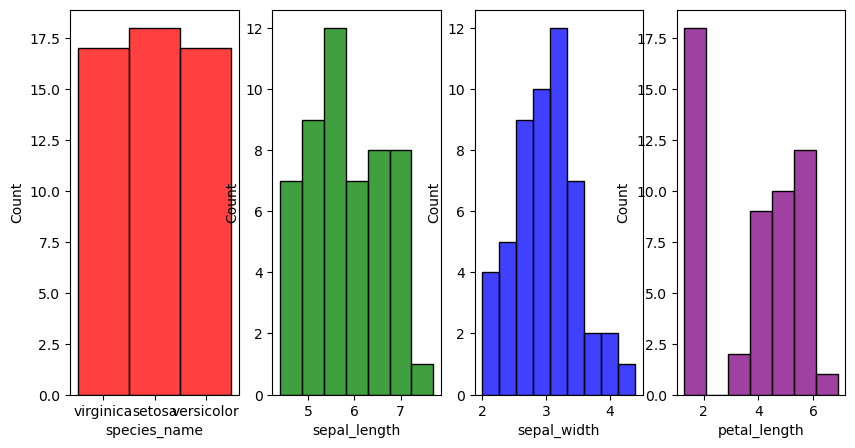

In [56]:
# Histogram for each measurement type
f, axes = plt.subplots(1, 4, figsize=(10,5))
sns.histplot(train.iloc[:,1], color="red", ax=axes[0])
sns.histplot(train.iloc[:,2], color="green", ax=axes[1])
sns.histplot(train.iloc[:,3], color="blue", ax=axes[2])
sns.histplot(train.iloc[:,4], color="purple", ax=axes[3])
plt.show()

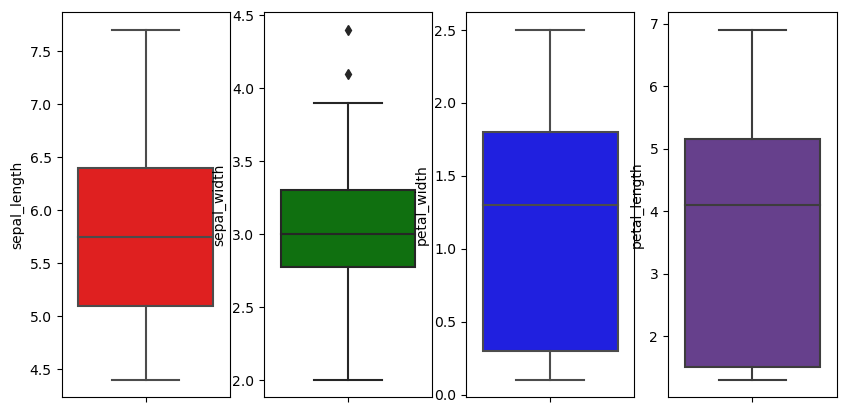

In [57]:
# Bar plots fore each measurement type
f, axes = plt.subplots(1, 4, figsize=(10,5))
sns.boxplot(y = train['sepal_length'], color = "red", ax=axes[0])
sns.boxplot(y = train['sepal_width'], color = "green", ax=axes[1])
sns.boxplot(y = train['petal_width'], color = "blue", ax=axes[2])
sns.boxplot(y = train['petal_length'], color="rebeccapurple", ax=axes[3])
plt.show()

In [59]:
train.describe()

,species_id,sepal_length,sepal_width,petal_length,petal_width
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.980769,5.823077,3.025000,3.734615,1.186538
std,0.828189,0.816164,0.494628,1.786538,0.777131
min,1.000000,4.400000,2.000000,1.300000,0.100000
25%,1.000000,5.100000,2.775000,1.500000,0.300000
50%,2.000000,5.750000,3.000000,4.100000,1.300000
75%,3.000000,6.400000,3.300000,5.150000,1.800000
max,3.000000,7.700000,4.400000,6.900000,2.500000


In [60]:
train.species_name.value_counts()

setosa        18
virginica     17
versicolor    17
Name: species_name, dtype: int64

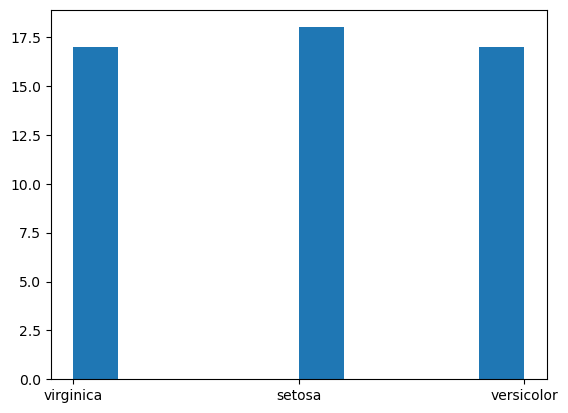

In [62]:
plt.hist(train.species_name)
plt.show()

# Bivariate Stats

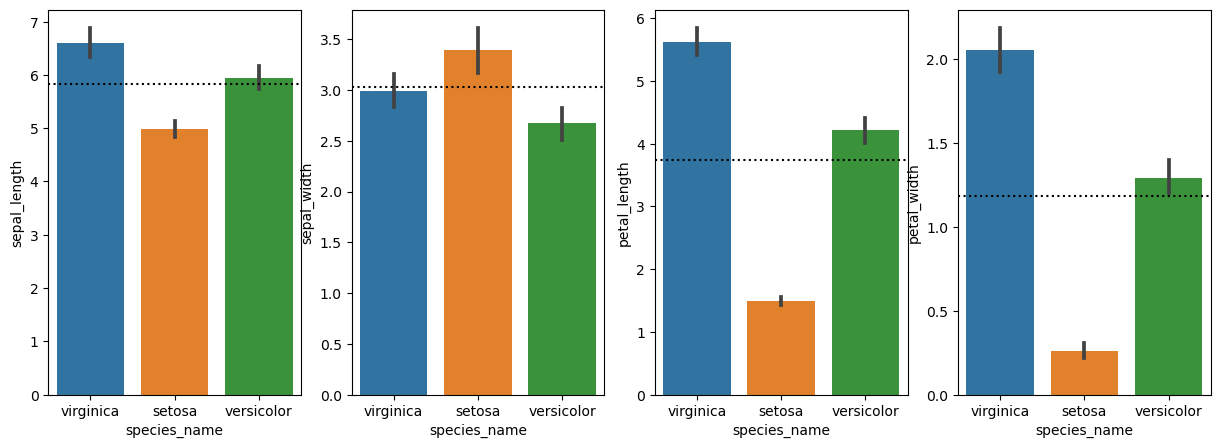

In [64]:
f, axes = plt.subplots(1, 4, figsize=(15,5))
sns.barplot(data=train, x="species_name", y="sepal_length",ax=axes[0])
l0 = axes[0].axhline(train.sepal_length.mean(),color='black', linestyle='dotted')
sns.barplot(data=train, x="species_name", y="sepal_width",ax=axes[1])
l1 = axes[1].axhline(train.sepal_width.mean(), color='black', linestyle='dotted')
sns.barplot(data=train, x="species_name", y="petal_length",ax=axes[2])
l2 = axes[2].axhline(train.petal_length.mean(), color='black', linestyle='dotted')
sns.barplot(data=train, x="species_name", y="petal_width",ax=axes[3])
L3 = axes[3].axhline(train.petal_width.mean(), color='black', linestyle='dotted')
plt.show()

In [66]:
train[train.species_name =='virginica'].describe().T

,count,mean,std,min,25%,50%,75%,max
species_id,17.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
sepal_length,17.0,6.600000,0.565685,5.7,6.3,6.7,6.9,7.7
sepal_width,17.0,2.988235,0.344388,2.2,2.8,3.0,3.2,3.6
petal_length,17.0,5.629412,0.484465,5.0,5.3,5.6,5.9,6.9
petal_width,17.0,2.058824,0.293809,1.5,1.8,2.1,2.3,2.5


In [67]:
train[train.species_name =='setosa'].describe().T

,count,mean,std,min,25%,50%,75%,max
species_id,18.0,1.000000,0.000000,1.0,1.0,1.00,1.000,1.0
sepal_length,18.0,4.977778,0.343949,4.4,4.8,5.00,5.175,5.7
sepal_width,18.0,3.394444,0.490465,2.3,3.1,3.40,3.675,4.4
petal_length,18.0,1.488889,0.136722,1.3,1.4,1.50,1.500,1.9
petal_width,18.0,0.261111,0.097853,0.1,0.2,0.25,0.300,0.4


In [68]:
train[train.species_name =='versicolor'].describe().T

,count,mean,std,min,25%,50%,75%,max
species_id,17.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
sepal_length,17.0,5.941176,0.466448,5.0,5.7,5.9,6.2,7.0
sepal_width,17.0,2.670588,0.342353,2.0,2.5,2.8,2.9,3.2
petal_length,17.0,4.217647,0.427544,3.5,4.0,4.1,4.6,4.9
petal_width,17.0,1.294118,0.210566,1.0,1.2,1.3,1.4,1.8


In [69]:
virginica = train[train.species_name == 'virginica']
versicolor = train[train.species_name == 'versicolor']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="two-sided")
t, p

#We have a significantly lower p value than 0.05, we can reject the null hypotehsis

test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="two-sided")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
235.0 0.001891189027363391
------------------


Comparing sepal_width between virginica and versicolor
218.5 0.010846397831057763
------------------


Comparing petal_length between virginica and versicolor
289.0 6.810076212287607e-07
------------------


Comparing petal_width between virginica and versicolor
284.0 1.4532844465355982e-06
------------------




Document takeaways & any actions.

Takeaways:

petal_length and petal_width show the most seperation between species.

### multivariate Stats

a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [71]:

#create new column that is area
train['sepal_area'] = train['sepal_length'] * train['sepal_width']
train['petal_area'] = train['petal_length'] * train['petal_width']
train.drop(columns="species_name")

#let's look at our new dataframe
train.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
143,3,virginica,6.8,3.2,5.9,2.3,21.76,13.57
26,1,setosa,5.0,3.4,1.6,0.4,17.00,0.64
79,2,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
129,3,virginica,7.2,3.0,5.8,1.6,21.60,9.28
54,2,versicolor,6.5,2.8,4.6,1.5,18.20,6.90


#import itertools

#list(itertools.combinations(train.drop(columns='species').columns, 2))


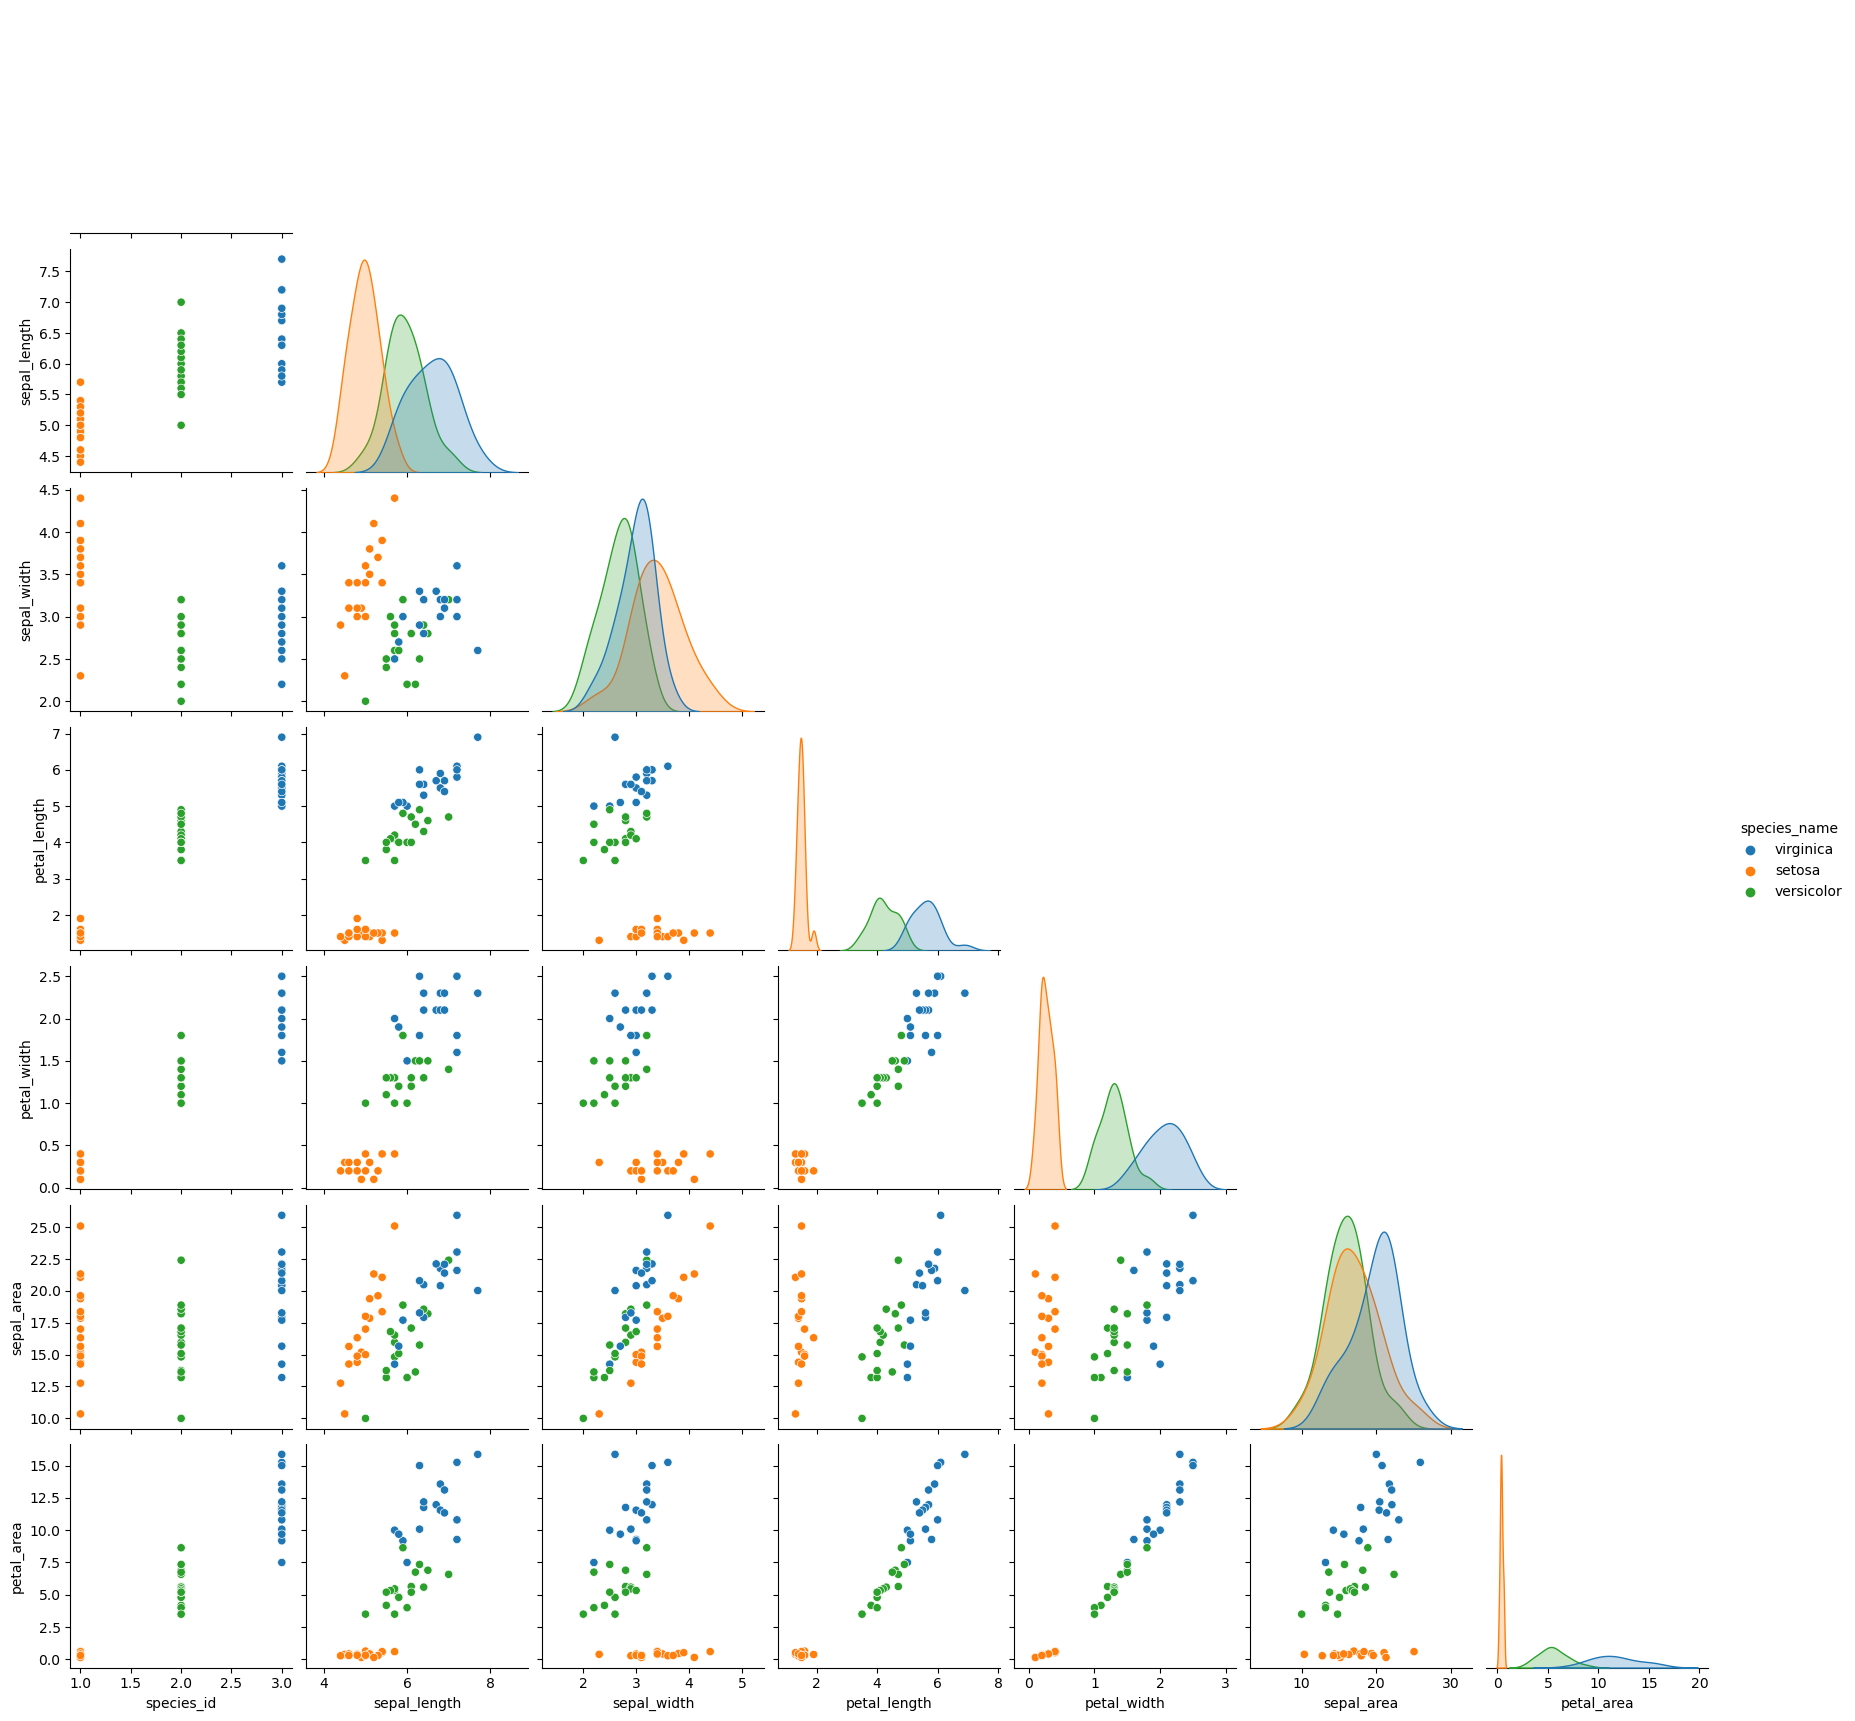

In [73]:
sns.pairplot(train, hue='species_name', corner=True)
plt.show()

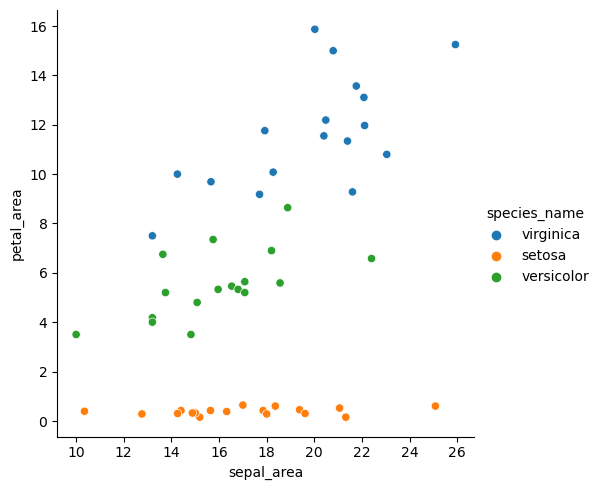

In [75]:
sns.relplot(x='sepal_area', y='petal_area', data=train, hue='species_name')


In [76]:
#see if there is correlation between variables 
train.corr()

/var/folders/mn/mp1xhgm522gc5vhffb_k61d00000gn/T/ipykernel_70236/2742871547.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,species_id,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
species_id,1.000000,0.824506,-0.348221,0.962568,0.959248,0.318254,0.949592
sepal_length,0.824506,1.000000,-0.096656,0.890335,0.853731,0.625788,0.869524
sepal_width,-0.348221,-0.096656,1.000000,-0.373109,-0.285784,0.711255,-0.215117
petal_length,0.962568,0.890335,-0.373109,1.000000,0.968889,0.340014,0.956710
petal_width,0.959248,0.853731,-0.285784,0.968889,1.000000,0.389498,0.983504
sepal_area,0.318254,0.625788,0.711255,0.340014,0.389498,1.000000,0.453756
petal_area,0.949592,0.869524,-0.215117,0.956710,0.983504,0.453756,1.000000


Hypothesis

alpha = .05

 Null: Sepal length is the same in virginica and setosa.

 Alternative: Sepal length significantly different in virginica and setosa.

In [85]:
alpha = 0.05


In [77]:
virginica = train[train['species_name'] == 'virginica']
setosa = train[train['species_name'] == 'setosa']

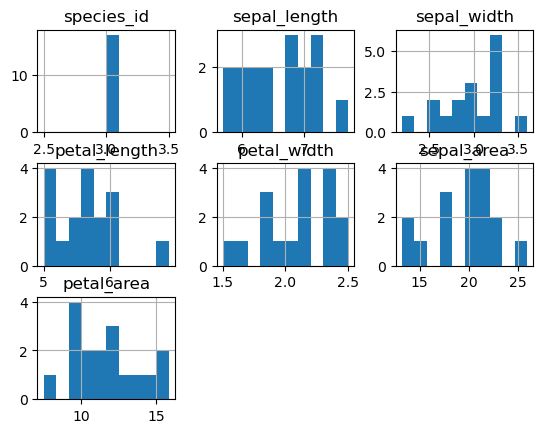

In [78]:
virginica.hist()
plt.show()

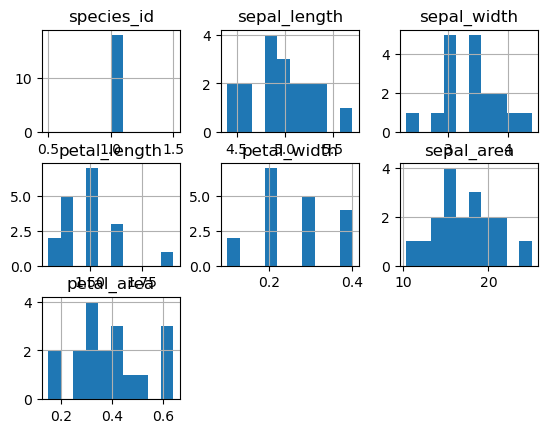

In [79]:
setosa.hist()
plt.show()

In [80]:
virginica.sepal_length.var()

0.32000000000000006

In [81]:
setosa.sepal_length.var()

0.11830065359477135

In [82]:
tstat, p = stats.ttest_ind(virginica.sepal_length, setosa.sepal_length, equal_var= False)

tstat, p

(10.17957157437404, 1.3867928194259415e-10)

In [86]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


In [84]:
stats.mannwhitneyu(virginica.sepal_length, setosa.sepal_area)


MannwhitneyuResult(statistic=0.0, pvalue=4.751815625495624e-07)

## Part II - Explore your titanic dataset more completely.

In [89]:
titanic = acquire.new_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [100]:
titanic.drop(columns =['class','embarked','passenger_id','deck'])

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


In [101]:
# Acquire and prep data
titanic = prep_titanic(new_titanic_data())
# Take a look
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [102]:
# split into train, validate, test
train, validate, test = split_data(titanic, target='survived')
# Take a look
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
114,114,0,3,female,17.0,0,0,14.4583,C,Third,None,Cherbourg,1
645,645,1,1,male,48.0,1,0,76.7292,C,First,D,Cherbourg,0
890,890,0,3,male,32.0,0,0,7.7500,Q,Third,None,Queenstown,1
784,784,0,3,male,25.0,0,0,7.0500,S,Third,None,Southampton,1
751,751,1,3,male,6.0,0,1,12.4750,S,Third,E,Southampton,0


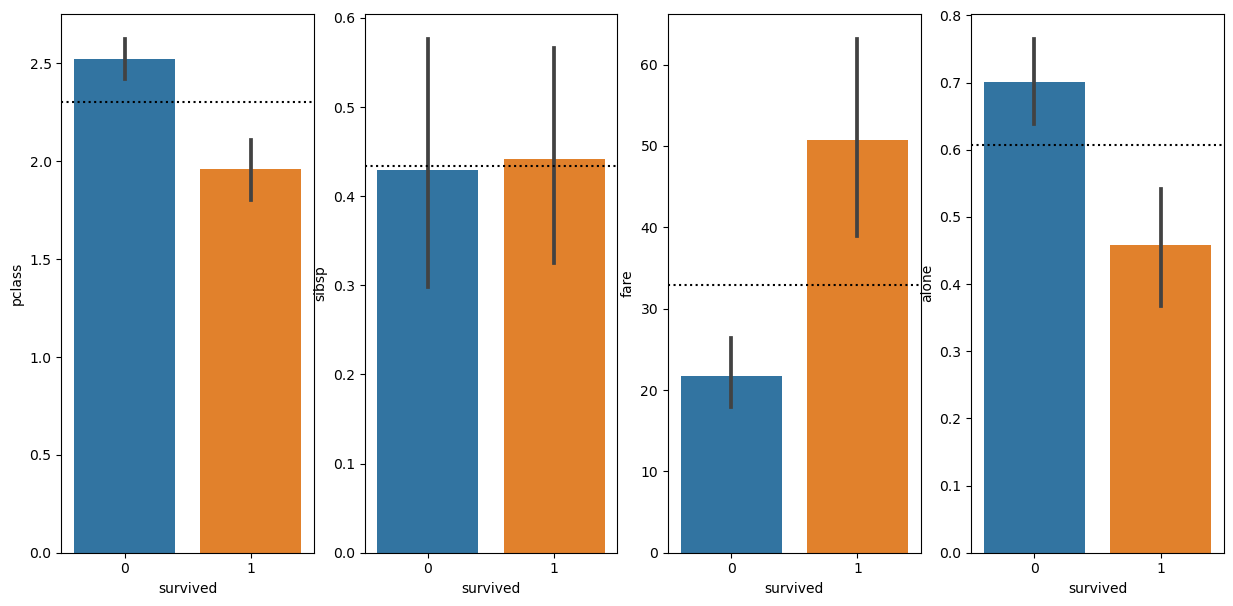

In [103]:
f, axes = plt.subplots(1, 4, figsize=(15,7))
sns.barplot(data=train, x="survived", y="pclass",ax=axes[0])
l0 = axes[0].axhline(train.pclass.mean(),color='black', linestyle='dotted')
sns.barplot(data=train, x="survived", y="sibsp",ax=axes[1])
l1 = axes[1].axhline(train.sibsp.mean(), color='black', linestyle='dotted')
sns.barplot(data=train, x="survived", y="fare",ax=axes[2])
l2 = axes[2].axhline(train.fare.mean(), color='black', linestyle='dotted')
sns.barplot(data=train, x="survived", y="alone",ax=axes[3])
l3 = axes[3].axhline(train.alone.mean(), color='black', linestyle='dotted')
plt.show()

### Part III - Explore Telco data

In [104]:
# Acquire and prep data
telco = prep_telco(new_telco_data())
# Take a look
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [105]:
# split into train, validate, test
train, validate, test = split_data(telco, target='churn')
# Take a look
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4196,1,1,1,5924-IFQTT,Male,0,Yes,Yes,13,Yes,...,Yes,Yes,No,Yes,72.8,930.05,No,Month-to-month,DSL,Electronic check
6112,4,2,2,8652-YHIYU,Female,0,No,Yes,16,Yes,...,Yes,No,No,Yes,79.5,1264.2,No,One year,Fiber optic,Credit card (automatic)
1347,1,2,1,2003-CKLOR,Male,0,No,No,66,Yes,...,No,Yes,Yes,No,99.5,6710.5,Yes,Month-to-month,Fiber optic,Electronic check
42,4,3,3,0071-NDAFP,Male,0,Yes,Yes,25,Yes,...,No internet service,No internet service,No internet service,No,25.5,630.6,No,Two year,None,Credit card (automatic)
6533,2,3,1,9277-JOOMO,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,24.6,86.35,No,Month-to-month,None,Mailed check


In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2464 entries, 4196 to 3925
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           2464 non-null   int64  
 1   internet_service_type_id  2464 non-null   int64  
 2   contract_type_id          2464 non-null   int64  
 3   customer_id               2464 non-null   object 
 4   gender                    2464 non-null   object 
 5   senior_citizen            2464 non-null   int64  
 6   partner                   2464 non-null   object 
 7   dependents                2464 non-null   object 
 8   tenure                    2464 non-null   int64  
 9   phone_service             2464 non-null   object 
 10  multiple_lines            2464 non-null   object 
 11  online_security           2464 non-null   object 
 12  online_backup             2464 non-null   object 
 13  device_protection         2464 non-null   object 
 14  tech_

In [107]:
# Drop null values stored as whitespace    
train['total_charges'] = train['total_charges'].str.strip()
train = train[train.total_charges != '']
    
# Convert to correct datatype
train['total_charges'] = train.total_charges.astype(float)


In [108]:
# Convert churn to number values
train['churn'] = train.churn.map({'Yes': 1, 'No': 0})

In [109]:
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4196,1,1,1,5924-IFQTT,Male,0,Yes,Yes,13,Yes,...,Yes,Yes,No,Yes,72.8,930.05,0,Month-to-month,DSL,Electronic check
6112,4,2,2,8652-YHIYU,Female,0,No,Yes,16,Yes,...,Yes,No,No,Yes,79.5,1264.20,0,One year,Fiber optic,Credit card (automatic)
1347,1,2,1,2003-CKLOR,Male,0,No,No,66,Yes,...,No,Yes,Yes,No,99.5,6710.50,1,Month-to-month,Fiber optic,Electronic check
42,4,3,3,0071-NDAFP,Male,0,Yes,Yes,25,Yes,...,No internet service,No internet service,No internet service,No,25.5,630.60,0,Two year,None,Credit card (automatic)
6533,2,3,1,9277-JOOMO,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,24.6,86.35,0,Month-to-month,None,Mailed check


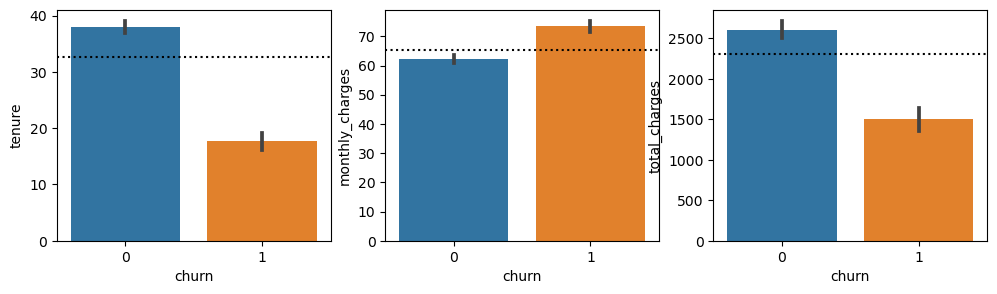

In [110]:
f, axes = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=train, x="churn", y="tenure",ax=axes[0])
l0 = axes[0].axhline(train.tenure.mean(),color='black', linestyle='dotted')
sns.barplot(data=train, x="churn", y="monthly_charges",ax=axes[1])
l1 = axes[1].axhline(train.monthly_charges.mean(), color='black', linestyle='dotted')
sns.barplot(data=train, x="churn", y="total_charges",ax=axes[2])
l2 = axes[2].axhline(train.total_charges.mean(), color='black', linestyle='dotted')
plt.show()